Many thanks to **Yassine Ghouzam**: [Introduction to CNN Keras ](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6/comments)

There is a lot to discover...


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data preparation

In [2]:
from keras.datasets import mnist, fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


Drop the `label` column first, then reshape the flattened array. 

The image size is [28, 28], with only 1 channel. We don't need to know the exact number of training examples, just leave the first dimension to -1.

In [22]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

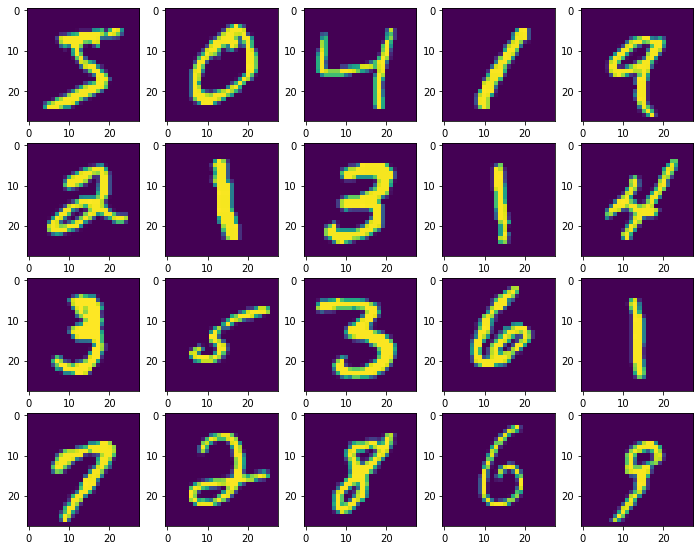

In [17]:
w=28
h=28
fig=plt.figure(figsize=(12, 12))
columns = 5
rows = 5
c = 1
i = 0
for img in X_train[:20]:
    fig.add_subplot(rows, columns, c)
    c += 1
    i += 1
    plt.imshow(img)
plt.show()

In [19]:
from keras.utils import np_utils
#(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
nb_classes = 10

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)
Y_train: (60000, 10)


In [23]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Now take the `label` column as y, then convert the integer label to one-hot representation using `to_categorical`.

In [105]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Since we're going to use `ImageDataGenerator` to generate augmented image data on the fly, we have to make self-defined validation set, instead of using `modoel.fit(validation_split=...)`.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.05)
print(X_train.shape)
print(X_val.shape)

(51442, 28, 28, 1)
(2708, 28, 28, 1)


Have a look at the data:

In [26]:
# input image dimensions
from keras import backend as K
img_rows, img_cols = 28, 28

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train:', X_train.shape)
print("Y_train:", Y_train[0])
print("Y_train:", Y_train.shape)
print('X_test:', X_val.shape)

X_train: (57000, 28, 28, 1)
Y_train: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Y_train: (57000, 10)
X_test: (3000, 28, 28, 1)


## Building CNN model with keras

In [27]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Flatten

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), padding='same', \
                 input_shape=(28, 28, 1), name='conv2d_1'))

model.add(MaxPool2D(pool_size=(2, 2), padding='same', name='maxpool_1'))

model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=(1, 1), padding='same', name='conv2d_2'))

model.add(MaxPool2D(pool_size=(2, 2), padding='same', name='maxpool_2'))

model.add(Flatten(name='flatten_1'))

model.add(Dense(256, activation='relu', name='dense_1'))
model.add(Dropout(0.4, name='dropout_1'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax', name='dense_2'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
__________

Use `ImageDataGenerator` to generate augmented image data on the fly. 

In [110]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rescale=1/255, # dividing all pixel value by 255, to make sure our input value is in (0,1)
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
)

Fit the model.

In [33]:
import keras
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', write_graph=True)

In [34]:
batch_size = 64

'''
data_flow = datagen.flow(x=X_train, y=Y_train, batch_size=batch_size)
history = model.fit_generator(data_flow, steps_per_epoch=len(X_train) // batch_size, \
                              epochs=10, validation_data=(X_val, Y_val))
'''
history = model.fit(X_train, Y_train, epochs=2, batch_size=batch_size, validation_split=0.5, callbacks=[tbCallBack])

Epoch 1/2
57000/57000 [==============================] - 526s 9ms/step - loss: 0.0554 - acc: 0.9834
Epoch 2/2
57000/57000 [==============================] - 541s 9ms/step - loss: 0.0452 - acc: 0.9861


## Predicting & Submission

[0, 1]


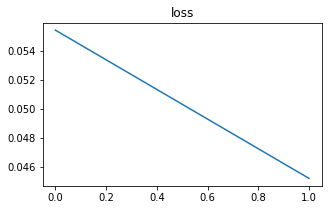

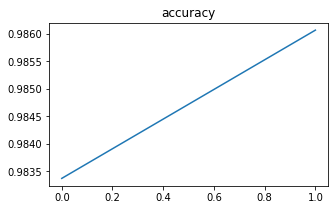

In [35]:
print(history.epoch)
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');

In [36]:
y_test = model.predict(X_val, verbose=1)
print(y_test)

3000/3000 [==============================] - 9s 3ms/step
[[5.7487051e-09 9.9999964e-01 6.5882177e-10 ... 3.1205997e-07
  2.3315497e-10 4.6178378e-10]
 [8.3612148e-09 3.1714521e-06 1.4909076e-04 ... 2.0997764e-05
  1.8148763e-06 3.8860594e-06]
 [4.0883243e-09 3.4135363e-07 1.6675616e-06 ... 5.3109038e-06
  4.3115065e-07 3.6613015e-03]
 ...
 [9.9996269e-01 8.9859832e-08 5.5501229e-08 ... 1.5602333e-06
  3.6672581e-09 3.2884458e-08]
 [1.8918360e-08 9.9999964e-01 4.9784760e-10 ... 2.9731950e-08
  2.2223523e-08 1.2506760e-07]
 [9.7219655e-09 4.0966131e-07 3.2918359e-04 ... 2.4358947e-04
  1.0684662e-06 6.1307389e-08]]


Convert the one hot representation back to integer representation.

In [57]:
y_test = np.argmax(y_test, axis=-1)
model.save("mnist.model")

Submission.

In [119]:
y_test = pd.DataFrame(y_test, index=range(1, len(y_test)+1), columns=['Label'])

In [120]:
y_test.to_csv("submission.csv", index_label='ImageId')